In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, TextBox, RadioButtons

In [19]:
%matplotlib widget

### Roses with the n interactive
$r = a sin (n\theta$)

$r = a cos (n\theta$)

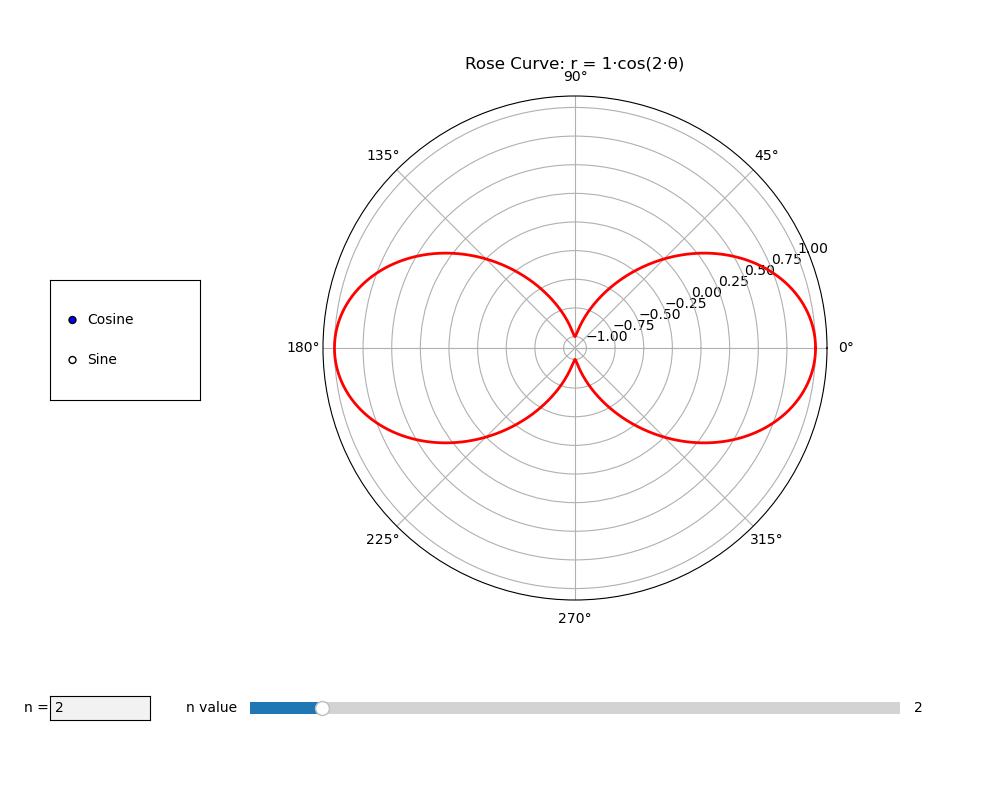

In [20]:
# Rose curve parameters
a_rose = 1

# Create figure with polar axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='polar')
plt.subplots_adjust(left=0.25, bottom=0.25)

# Full theta range for complete visualization
theta = np.linspace(0, 2*np.pi, 1000)

# Rose curve function
def calculate_rose(theta, a, n, use_cos=True):
    if use_cos:
        return a * np.cos(n * theta)
    else:
        return a * np.sin(n * theta)

# Initial values
initial_n = 2
# Store plot state in a dictionary to avoid using nonlocal
plot_state = {'use_cosine': True, 'n_value': initial_n}

# Initial plot
r = calculate_rose(theta, a_rose, initial_n, plot_state['use_cosine'])
line, = ax.plot(theta, r, 'r-', linewidth=2)

# Set up the plot
ax.set_title(f'Rose Curve: r = {a_rose}·cos({initial_n}·θ)', pad=20)
ax.grid(True)

# Function to update the plot
def update_plot(n=None, func_type=None):
    if n is not None:
        plot_state['n_value'] = int(n)
    
    if func_type is not None:
        plot_state['use_cosine'] = (func_type == 'Cosine')
    
    # Recalculate r
    new_r = calculate_rose(theta, a_rose, plot_state['n_value'], plot_state['use_cosine'])
    
    # Update the line data
    line.set_data(theta, new_r)
    
    # Update title with correct function
    func_name = 'cos' if plot_state['use_cosine'] else 'sin'
    ax.set_title(f'Rose Curve: r = {a_rose}·{func_name}({plot_state["n_value"]}·θ)', pad=20)
    
    fig.canvas.draw_idle()

# Create slider for n
ax_n = plt.axes([0.25, 0.1, 0.65, 0.03])
slider_n = Slider(
    ax_n, 'n value', 
    1, 10, 
    valinit=initial_n,
    valstep=1
)

# Update function for slider
slider_n.on_changed(update_plot)

# Create text box for n
ax_box = plt.axes([0.05, 0.1, 0.1, 0.03])
text_box = TextBox(ax_box, 'n =', initial=f'{initial_n}')

# Update function for text box
def submit_n(text):
    try:
        new_n = int(text)
        new_n = max(1, min(new_n, 10))  # Limit between 1 and 10
        slider_n.set_val(new_n)  # This will trigger the slider callback
    except ValueError:
        pass  # Ignore invalid input

text_box.on_submit(submit_n)

# Add radio buttons to switch between cosine and sine
ax_radio = plt.axes([0.05, 0.5, 0.15, 0.15])
radio = RadioButtons(ax_radio, ('Cosine', 'Sine'), active=0)
radio.on_clicked(lambda label: update_plot(func_type=label))

plt.show()

### Limaçons with the b interactive

$r = a + b*sin\theta$

$r = a + b*cos\theta$

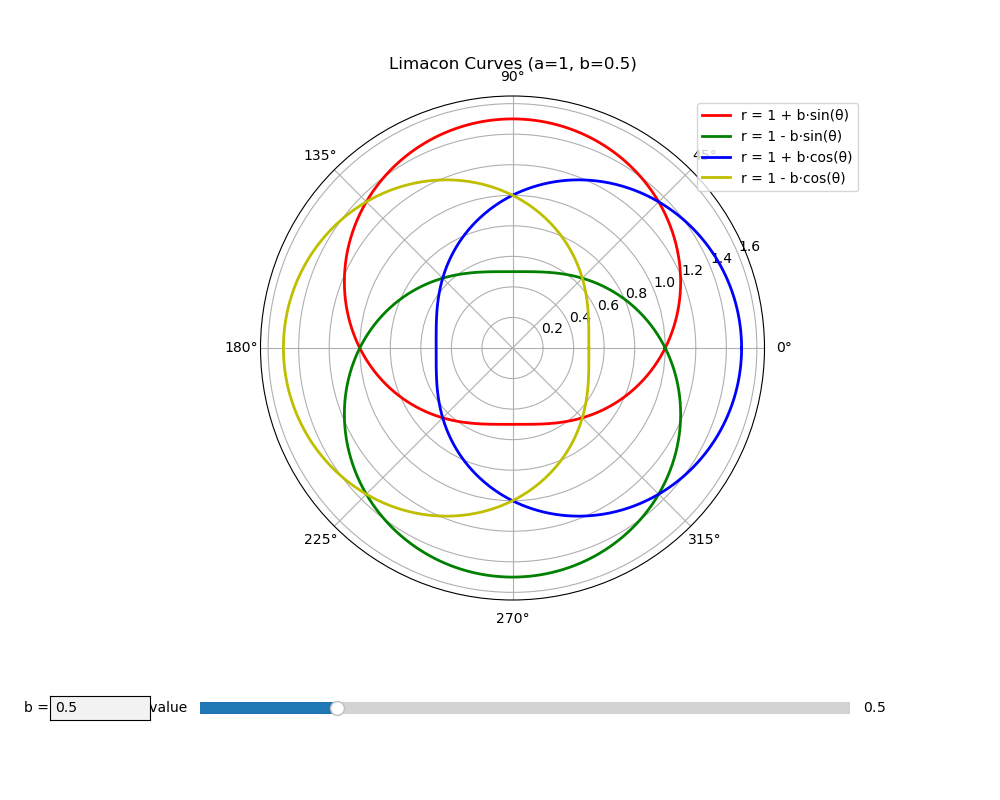

In [21]:
# Fixed 'a' parameter
a_limacon = 1

# Create figure with polar axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='polar')
plt.subplots_adjust(bottom=0.25)

# Theta range
theta = np.linspace(0, 2*np.pi, 1000)

# Initial b value
initial_b = 0.5

# Limacon functions
def calculate_limacon_plus_sin(theta, a, b):
    return a + b * np.sin(theta)

def calculate_limacon_minus_sin(theta, a, b):
    return a - b * np.sin(theta)

def calculate_limacon_plus_cos(theta, a, b):
    return a + b * np.cos(theta)

def calculate_limacon_minus_cos(theta, a, b):
    return a - b * np.cos(theta)

# Initial plots
r_plus_sin = calculate_limacon_plus_sin(theta, a_limacon, initial_b)
r_minus_sin = calculate_limacon_minus_sin(theta, a_limacon, initial_b)
r_plus_cos = calculate_limacon_plus_cos(theta, a_limacon, initial_b)
r_minus_cos = calculate_limacon_minus_cos(theta, a_limacon, initial_b)

line_plus_sin, = ax.plot(theta, r_plus_sin, 'r-', linewidth=2, label=f'r = {a_limacon} + b·sin(θ)')
line_minus_sin, = ax.plot(theta, r_minus_sin, 'g-', linewidth=2, label=f'r = {a_limacon} - b·sin(θ)')
line_plus_cos, = ax.plot(theta, r_plus_cos, 'b-', linewidth=2, label=f'r = {a_limacon} + b·cos(θ)')
line_minus_cos, = ax.plot(theta, r_minus_cos, 'y-', linewidth=2, label=f'r = {a_limacon} - b·cos(θ)')

# Set up the plot
ax.set_title(f'Limacon Curves (a={a_limacon}, b={initial_b})', pad=20)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Function to update the plot
def update_plot(val):
    b_value = slider_b.val
    
    # Recalculate r values
    new_r_plus_sin = calculate_limacon_plus_sin(theta, a_limacon, b_value)
    new_r_minus_sin = calculate_limacon_minus_sin(theta, a_limacon, b_value)
    new_r_plus_cos = calculate_limacon_plus_cos(theta, a_limacon, b_value)
    new_r_minus_cos = calculate_limacon_minus_cos(theta, a_limacon, b_value)
    
    # Update the line data
    line_plus_sin.set_data(theta, new_r_plus_sin)
    line_minus_sin.set_data(theta, new_r_minus_sin)
    line_plus_cos.set_data(theta, new_r_plus_cos)
    line_minus_cos.set_data(theta, new_r_minus_cos)
    
    # Update title
    ax.set_title(f'Limacon Curves (a={a_limacon}, b={b_value:.2f})', pad=20)
    
    # Update ylim for better visualization as b changes
    max_r = max(
        np.max(new_r_plus_sin),
        np.max(new_r_minus_sin),
        np.max(new_r_plus_cos),
        np.max(new_r_minus_cos)
    )
    min_r = min(
        np.min(new_r_plus_sin),
        np.min(new_r_minus_sin),
        np.min(new_r_plus_cos),
        np.min(new_r_minus_cos)
    )
    
    # Adjust for negative values
    if min_r < 0:
        ax.set_ylim(min_r * 1.1, max_r * 1.1)
    else:
        ax.set_ylim(0, max_r * 1.1)
    
    fig.canvas.draw_idle()

# Create slider for b
ax_b = plt.axes([0.2, 0.1, 0.65, 0.03])
slider_b = Slider(
    ax_b, 'b value', 
    0.1, 2.0, 
    valinit=initial_b,
    valstep=0.05
)

# Update function for slider
slider_b.on_changed(update_plot)

# Create text box for b
ax_box = plt.axes([0.05, 0.1, 0.1, 0.03])
text_box = TextBox(ax_box, 'b =', initial=f'{initial_b:.1f}')

# Update function for text box
def submit_b(text):
    try:
        new_b = float(text)
        new_b = max(0.1, min(new_b, 2.0))  # Limit between 0.1 and 2.0
        slider_b.set_val(new_b)  # This will trigger the slider callback
    except ValueError:
        pass  # Ignore invalid input

text_box.on_submit(submit_b)

# Set initial plot limits
max_r_initial = max(
    np.max(r_plus_sin),
    np.max(r_minus_sin),
    np.max(r_plus_cos),
    np.max(r_minus_cos)
)
min_r_initial = min(
    np.min(r_plus_sin),
    np.min(r_minus_sin),
    np.min(r_plus_cos),
    np.min(r_minus_cos)
)

if min_r_initial < 0:
    ax.set_ylim(min_r_initial * 1.1, max_r_initial * 1.1)
else:
    ax.set_ylim(0, max_r_initial * 1.1)

plt.show()

### Limaçons with the a interactive

$r = a + b*sin\theta$

$r = a + b*cos\theta$

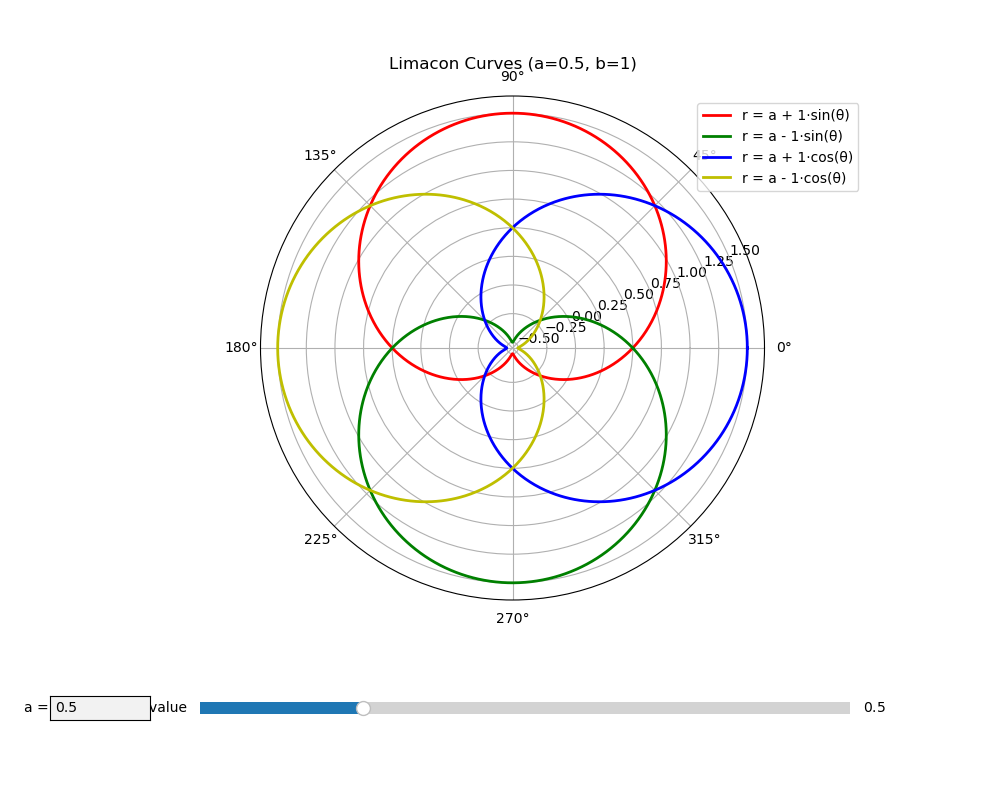

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, TextBox

# Fixed 'b' parameter
b_limacon = 1

# Create figure with polar axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='polar')
plt.subplots_adjust(bottom=0.25)

# Theta range
theta = np.linspace(0, 2*np.pi, 1000)

# Initial a value
initial_a = 0.5

# Limacon functions
def calculate_limacon_plus_sin(theta, a, b):
    return a + b * np.sin(theta)

def calculate_limacon_minus_sin(theta, a, b):
    return a - b * np.sin(theta)

def calculate_limacon_plus_cos(theta, a, b):
    return a + b * np.cos(theta)

def calculate_limacon_minus_cos(theta, a, b):
    return a - b * np.cos(theta)

# Initial plots
r_plus_sin = calculate_limacon_plus_sin(theta, initial_a, b_limacon)
r_minus_sin = calculate_limacon_minus_sin(theta, initial_a, b_limacon)
r_plus_cos = calculate_limacon_plus_cos(theta, initial_a, b_limacon)
r_minus_cos = calculate_limacon_minus_cos(theta, initial_a, b_limacon)

line_plus_sin, = ax.plot(theta, r_plus_sin, 'r-', linewidth=2, label=f'r = a + {b_limacon}·sin(θ)')
line_minus_sin, = ax.plot(theta, r_minus_sin, 'g-', linewidth=2, label=f'r = a - {b_limacon}·sin(θ)')
line_plus_cos, = ax.plot(theta, r_plus_cos, 'b-', linewidth=2, label=f'r = a + {b_limacon}·cos(θ)')
line_minus_cos, = ax.plot(theta, r_minus_cos, 'y-', linewidth=2, label=f'r = a - {b_limacon}·cos(θ)')

# Set up the plot
ax.set_title(f'Limacon Curves (a={initial_a}, b={b_limacon})', pad=20)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Function to update the plot
def update_plot(val):
    a_value = slider_a.val
    
    # Recalculate r values
    new_r_plus_sin = calculate_limacon_plus_sin(theta, a_value, b_limacon)
    new_r_minus_sin = calculate_limacon_minus_sin(theta, a_value, b_limacon)
    new_r_plus_cos = calculate_limacon_plus_cos(theta, a_value, b_limacon)
    new_r_minus_cos = calculate_limacon_minus_cos(theta, a_value, b_limacon)
    
    # Update the line data
    line_plus_sin.set_data(theta, new_r_plus_sin)
    line_minus_sin.set_data(theta, new_r_minus_sin)
    line_plus_cos.set_data(theta, new_r_plus_cos)
    line_minus_cos.set_data(theta, new_r_minus_cos)
    
    # Update title
    ax.set_title(f'Limacon Curves (a={a_value:.2f}, b={b_limacon})', pad=20)
    
    # Update ylim for better visualization as a changes
    max_r = max(
        np.max(new_r_plus_sin),
        np.max(new_r_minus_sin),
        np.max(new_r_plus_cos),
        np.max(new_r_minus_cos)
    )
    min_r = min(
        np.min(new_r_plus_sin),
        np.min(new_r_minus_sin),
        np.min(new_r_plus_cos),
        np.min(new_r_minus_cos)
    )
    
    # Adjust for negative values
    if min_r < 0:
        ax.set_ylim(min_r * 1.1, max_r * 1.1)
    else:
        ax.set_ylim(0, max_r * 1.1)
    
    fig.canvas.draw_idle()

# Create slider for a
ax_a = plt.axes([0.2, 0.1, 0.65, 0.03])
slider_a = Slider(
    ax_a, 'a value', 
    0.0, 2.0, 
    valinit=initial_a,
    valstep=0.05
)

# Update function for slider
slider_a.on_changed(update_plot)

# Create text box for a
ax_box = plt.axes([0.05, 0.1, 0.1, 0.03])
text_box = TextBox(ax_box, 'a =', initial=f'{initial_a:.1f}')

# Update function for text box
def submit_a(text):
    try:
        new_a = float(text)
        new_a = max(0.0, min(new_a, 2.0))  # Limit between 0.0 and 2.0
        slider_a.set_val(new_a)  # This will trigger the slider callback
    except ValueError:
        pass  # Ignore invalid input

text_box.on_submit(submit_a)

# Set initial plot limits
max_r_initial = max(
    np.max(r_plus_sin),
    np.max(r_minus_sin),
    np.max(r_plus_cos),
    np.max(r_minus_cos)
)
min_r_initial = min(
    np.min(r_plus_sin),
    np.min(r_minus_sin),
    np.min(r_plus_cos),
    np.min(r_minus_cos)
)

if min_r_initial < 0:
    ax.set_ylim(min_r_initial * 1.1, max_r_initial * 1.1)
else:
    ax.set_ylim(0, max_r_initial * 1.1)

plt.show()

### Lemniscates with the n interactive

$r^2=a^2 sin (n\theta$)

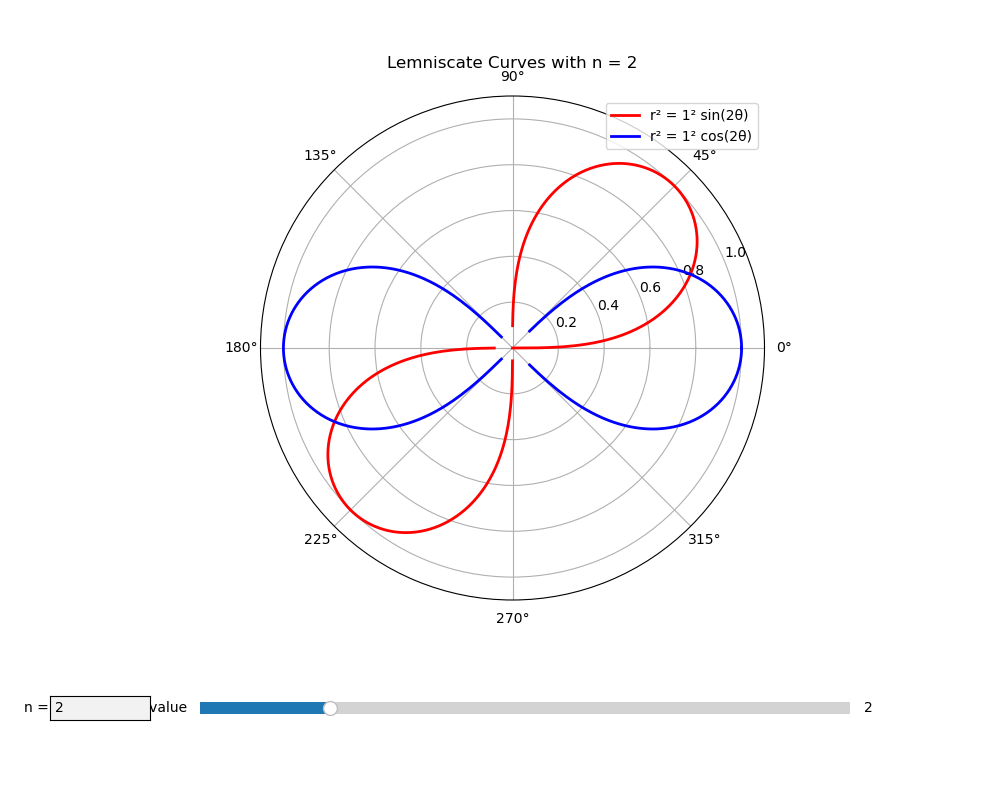

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, TextBox

# Fixed 'a' parameter
a_value = 1

# Create figure with polar axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='polar')
plt.subplots_adjust(bottom=0.25)

# Theta range - full circle
theta = np.linspace(0, 2*np.pi, 1000)

# Initial n value
initial_n = 2

# Lemniscate functions
def calculate_lemniscate_sin(theta, a, n):
    r_squared = a**2 * np.sin(n * theta)
    # Handle negative values (which give imaginary r)
    r = np.sqrt(np.maximum(r_squared, 0))
    # Create mask for invalid points
    mask = r_squared >= 0
    # Where mask is False, set r to NaN to avoid plotting
    r[~mask] = np.nan
    return r

def calculate_lemniscate_cos(theta, a, n):
    r_squared = a**2 * np.cos(n * theta)
    # Handle negative values (which give imaginary r)
    r = np.sqrt(np.maximum(r_squared, 0))
    # Create mask for invalid points
    mask = r_squared >= 0
    # Where mask is False, set r to NaN to avoid plotting
    r[~mask] = np.nan
    return r

# Initial plots
r_sin = calculate_lemniscate_sin(theta, a_value, initial_n)
r_cos = calculate_lemniscate_cos(theta, a_value, initial_n)

line_sin, = ax.plot(theta, r_sin, 'r-', linewidth=2, label=f'r² = {a_value}² sin({initial_n}θ)')
line_cos, = ax.plot(theta, r_cos, 'b-', linewidth=2, label=f'r² = {a_value}² cos({initial_n}θ)')

# Set up the plot
ax.set_title(f'Lemniscate Curves with n = {initial_n}', pad=20)
ax.grid(True)
ax.legend(loc='upper right')

# Function to update the plot
def update_plot(val):
    n_value = slider_n.val
    
    # Recalculate r values
    new_r_sin = calculate_lemniscate_sin(theta, a_value, n_value)
    new_r_cos = calculate_lemniscate_cos(theta, a_value, n_value)
    
    # Update the line data
    line_sin.set_data(theta, new_r_sin)
    line_cos.set_data(theta, new_r_cos)
    
    # Update labels
    line_sin.set_label(f'r² = {a_value}² sin({n_value}θ)')
    line_cos.set_label(f'r² = {a_value}² cos({n_value}θ)')
    
    # Update title
    ax.set_title(f'Lemniscate Curves with n = {n_value}', pad=20)
    
    # Update legend
    ax.legend(loc='upper right')
    
    # Update ylim to ensure consistent display
    max_r = max(
        np.nanmax(new_r_sin),
        np.nanmax(new_r_cos)
    )
    ax.set_ylim(0, max_r * 1.1)
    
    fig.canvas.draw_idle()

# Create slider for n
ax_n = plt.axes([0.2, 0.1, 0.65, 0.03])
slider_n = Slider(
    ax_n, 'n value', 
    1, 6, 
    valinit=initial_n,
    valstep=0.5
)

# Update function for slider
slider_n.on_changed(update_plot)

# Create text box for n
ax_box = plt.axes([0.05, 0.1, 0.1, 0.03])
text_box = TextBox(ax_box, 'n =', initial=f'{initial_n}')

# Update function for text box
def submit_n(text):
    try:
        new_n = float(text)
        new_n = max(0.5, min(new_n, 6))  # Limit between 0.5 and 6
        slider_n.set_val(new_n)  # This will trigger the slider callback
    except ValueError:
        pass  # Ignore invalid input

text_box.on_submit(submit_n)

# Set initial plot limits
max_r_initial = max(
    np.nanmax(r_sin),
    np.nanmax(r_cos)
)
ax.set_ylim(0, max_r_initial * 1.1)

plt.show()

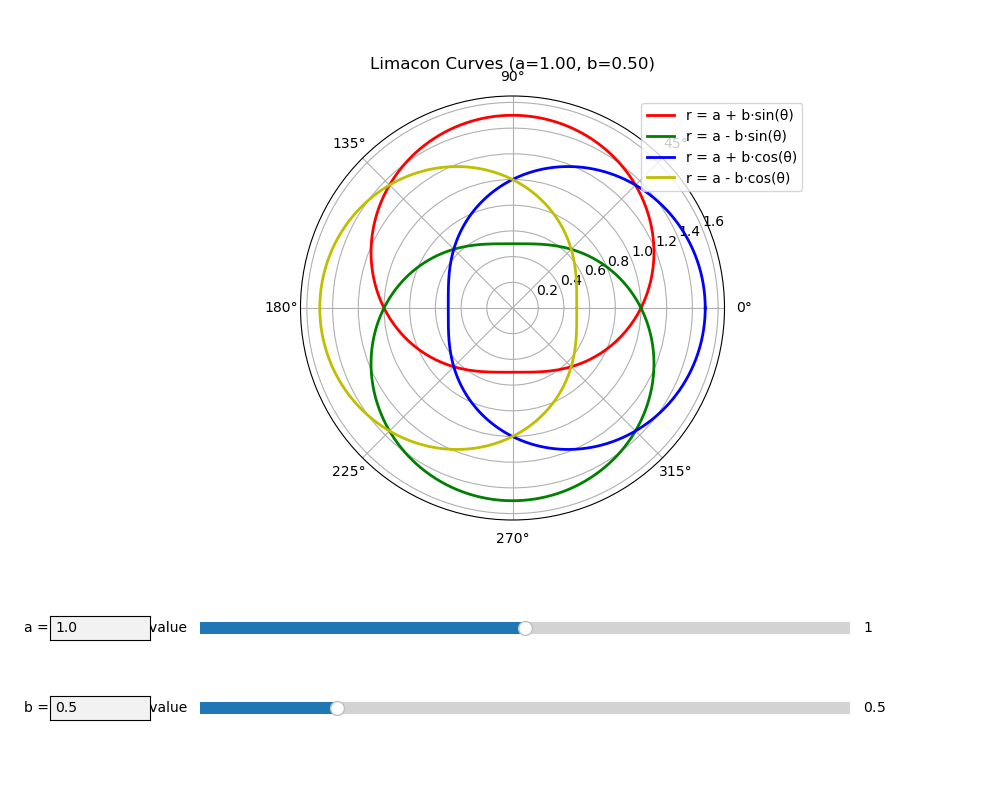

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, TextBox

# Initial values
initial_a = 1.0
initial_b = 0.5

# Create figure with polar axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='polar')
plt.subplots_adjust(bottom=0.35)  # More space at bottom for two sliders

# Theta range
theta = np.linspace(0, 2*np.pi, 1000)

# Limacon functions
def calculate_limacon_plus_sin(theta, a, b):
    return a + b * np.sin(theta)

def calculate_limacon_minus_sin(theta, a, b):
    return a - b * np.sin(theta)

def calculate_limacon_plus_cos(theta, a, b):
    return a + b * np.cos(theta)

def calculate_limacon_minus_cos(theta, a, b):
    return a - b * np.cos(theta)

# Initial plots
r_plus_sin = calculate_limacon_plus_sin(theta, initial_a, initial_b)
r_minus_sin = calculate_limacon_minus_sin(theta, initial_a, initial_b)
r_plus_cos = calculate_limacon_plus_cos(theta, initial_a, initial_b)
r_minus_cos = calculate_limacon_minus_cos(theta, initial_a, initial_b)

line_plus_sin, = ax.plot(theta, r_plus_sin, 'r-', linewidth=2, label=f'r = a + b·sin(θ)')
line_minus_sin, = ax.plot(theta, r_minus_sin, 'g-', linewidth=2, label=f'r = a - b·sin(θ)')
line_plus_cos, = ax.plot(theta, r_plus_cos, 'b-', linewidth=2, label=f'r = a + b·cos(θ)')
line_minus_cos, = ax.plot(theta, r_minus_cos, 'y-', linewidth=2, label=f'r = a - b·cos(θ)')

# Set up the plot
ax.set_title(f'Limacon Curves (a={initial_a:.2f}, b={initial_b:.2f})', pad=20)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Function to update the plot
def update_plot(val=None):
    # Get current values from sliders
    a_value = slider_a.val
    b_value = slider_b.val
    
    # Recalculate r values
    new_r_plus_sin = calculate_limacon_plus_sin(theta, a_value, b_value)
    new_r_minus_sin = calculate_limacon_minus_sin(theta, a_value, b_value)
    new_r_plus_cos = calculate_limacon_plus_cos(theta, a_value, b_value)
    new_r_minus_cos = calculate_limacon_minus_cos(theta, a_value, b_value)
    
    # Update the line data
    line_plus_sin.set_data(theta, new_r_plus_sin)
    line_minus_sin.set_data(theta, new_r_minus_sin)
    line_plus_cos.set_data(theta, new_r_plus_cos)
    line_minus_cos.set_data(theta, new_r_minus_cos)
    
    # Update title
    ax.set_title(f'Limacon Curves (a={a_value:.2f}, b={b_value:.2f})', pad=20)
    
    # Update ylim for better visualization as parameters change
    max_r = max(
        np.max(new_r_plus_sin),
        np.max(new_r_minus_sin),
        np.max(new_r_plus_cos),
        np.max(new_r_minus_cos)
    )
    min_r = min(
        np.min(new_r_plus_sin),
        np.min(new_r_minus_sin),
        np.min(new_r_plus_cos),
        np.min(new_r_minus_cos)
    )
    
    # Adjust for negative values
    if min_r < 0:
        ax.set_ylim(min_r * 1.1, max_r * 1.1)
    else:
        ax.set_ylim(0, max_r * 1.1)
    
    fig.canvas.draw_idle()

# Create slider for a (positioned above the b slider)
ax_a = plt.axes([0.2, 0.2, 0.65, 0.03])
slider_a = Slider(
    ax_a, 'a value', 
    0.0, 2.0, 
    valinit=initial_a,
    valstep=0.05
)

# Create slider for b
ax_b = plt.axes([0.2, 0.1, 0.65, 0.03])
slider_b = Slider(
    ax_b, 'b value', 
    0.1, 2.0, 
    valinit=initial_b,
    valstep=0.05
)

# Update function for sliders
slider_a.on_changed(update_plot)
slider_b.on_changed(update_plot)

# Create text box for a
ax_box_a = plt.axes([0.05, 0.2, 0.1, 0.03])
text_box_a = TextBox(ax_box_a, 'a =', initial=f'{initial_a:.1f}')

# Create text box for b
ax_box_b = plt.axes([0.05, 0.1, 0.1, 0.03])
text_box_b = TextBox(ax_box_b, 'b =', initial=f'{initial_b:.1f}')

# Update function for text boxes
def submit_a(text):
    try:
        new_a = float(text)
        new_a = max(0.0, min(new_a, 2.0))  # Limit between 0.0 and 2.0
        slider_a.set_val(new_a)  # This will trigger the slider callback
    except ValueError:
        pass  # Ignore invalid input

def submit_b(text):
    try:
        new_b = float(text)
        new_b = max(0.1, min(new_b, 2.0))  # Limit between 0.1 and 2.0
        slider_b.set_val(new_b)  # This will trigger the slider callback
    except ValueError:
        pass  # Ignore invalid input

text_box_a.on_submit(submit_a)
text_box_b.on_submit(submit_b)

# Set initial plot limits
max_r_initial = max(
    np.max(r_plus_sin),
    np.max(r_minus_sin),
    np.max(r_plus_cos),
    np.max(r_minus_cos)
)
min_r_initial = min(
    np.min(r_plus_sin),
    np.min(r_minus_sin),
    np.min(r_plus_cos),
    np.min(r_minus_cos)
)

if min_r_initial < 0:
    ax.set_ylim(min_r_initial * 1.1, max_r_initial * 1.1)
else:
    ax.set_ylim(0, max_r_initial * 1.1)

plt.show()

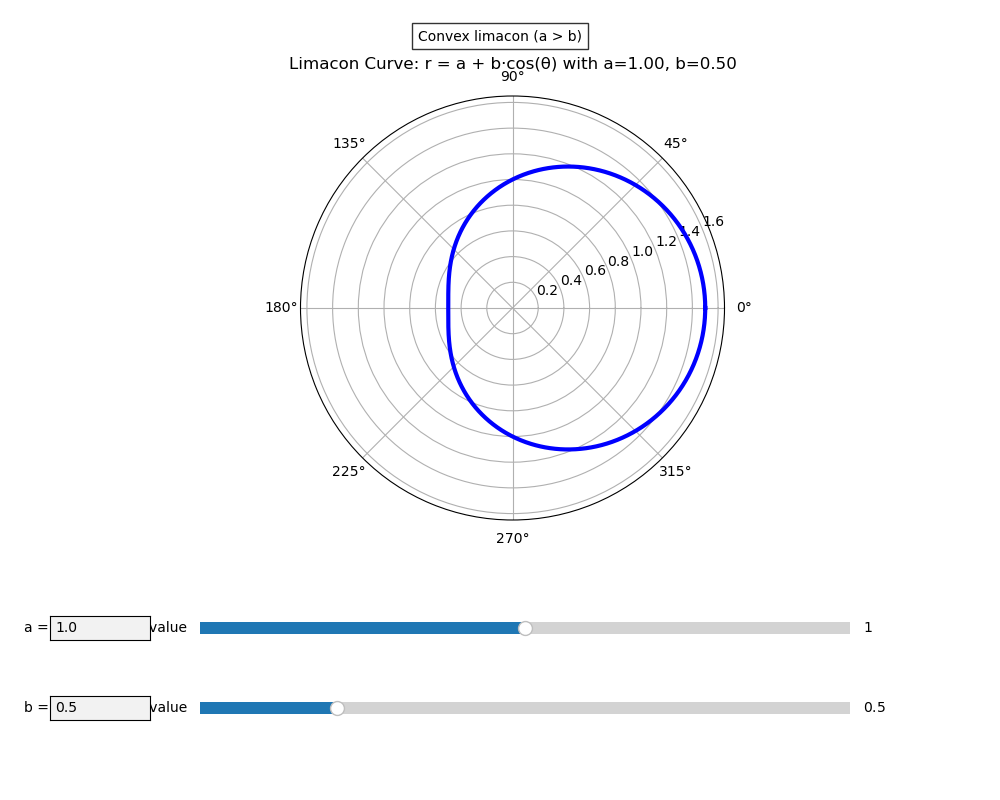

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, TextBox

# Create figure with polar axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='polar')
plt.subplots_adjust(bottom=0.35)  # More space at bottom for sliders

# Theta range
theta = np.linspace(0, 2*np.pi, 1000)

# Initial values
initial_a = 1.0
initial_b = 0.5

# Limacon function - using cosine for clearer inner loop when a<b
def calculate_limacon(theta, a, b):
    return a + b * np.cos(theta)

# Initial plot
r = calculate_limacon(theta, initial_a, initial_b)
line, = ax.plot(theta, r, 'b-', linewidth=3)

# Set up the plot
ax.set_title(f'Limacon Curve: r = a + b·cos(θ) with a={initial_a:.2f}, b={initial_b:.2f}', pad=20)
ax.grid(True)

# Add text annotation about curve type
def get_curve_type(a, b):
    if abs(a - b) < 0.05:  # Close enough to be considered equal
        return "Cardioid (a ≈ b)"
    elif a > b:
        return "Convex limacon (a > b)"
    else:
        return "Limacon with inner loop (a < b)"

text_box = ax.text(0.5, 0.95, get_curve_type(initial_a, initial_b), 
                  transform=fig.transFigure, ha='center',
                  bbox=dict(facecolor='white', alpha=0.8))

# Function to update the plot
def update_plot(val=None):
    # Get current values from sliders
    a_value = slider_a.val
    b_value = slider_b.val
    
    # Recalculate r values
    new_r = calculate_limacon(theta, a_value, b_value)
    
    # Update the line data
    line.set_data(theta, new_r)
    
    # Update title
    ax.set_title(f'Limacon Curve: r = a + b·cos(θ) with a={a_value:.2f}, b={b_value:.2f}', pad=20)
    
    # Update curve type annotation
    text_box.set_text(get_curve_type(a_value, b_value))
    
    # Update ylim for better visualization
    max_r = np.max(new_r)
    min_r = np.min(new_r)
    
    # Adjust for negative values
    if min_r < 0:
        ax.set_ylim(min_r * 1.1, max_r * 1.1)
    else:
        ax.set_ylim(0, max_r * 1.1)
    
    fig.canvas.draw_idle()

# Create slider for a
ax_a = plt.axes([0.2, 0.2, 0.65, 0.03])
slider_a = Slider(
    ax_a, 'a value', 
    0.0, 2.0, 
    valinit=initial_a,
    valstep=0.05
)

# Create slider for b
ax_b = plt.axes([0.2, 0.1, 0.65, 0.03])
slider_b = Slider(
    ax_b, 'b value', 
    0.1, 2.0, 
    valinit=initial_b,
    valstep=0.05
)

# Update function for sliders
slider_a.on_changed(update_plot)
slider_b.on_changed(update_plot)

# Create text box for a
ax_box_a = plt.axes([0.05, 0.2, 0.1, 0.03])
text_box_a = TextBox(ax_box_a, 'a =', initial=f'{initial_a:.1f}')

# Create text box for b
ax_box_b = plt.axes([0.05, 0.1, 0.1, 0.03])
text_box_b = TextBox(ax_box_b, 'b =', initial=f'{initial_b:.1f}')

# Update function for text boxes
def submit_a(text):
    try:
        new_a = float(text)
        new_a = max(0.0, min(new_a, 2.0))  # Limit between 0.0 and 2.0
        slider_a.set_val(new_a)  # This will trigger the slider callback
    except ValueError:
        pass  # Ignore invalid input

def submit_b(text):
    try:
        new_b = float(text)
        new_b = max(0.1, min(new_b, 2.0))  # Limit between 0.1 and 2.0
        slider_b.set_val(new_b)  # This will trigger the slider callback
    except ValueError:
        pass  # Ignore invalid input

text_box_a.on_submit(submit_a)
text_box_b.on_submit(submit_b)

# Set initial plot limits
max_r_initial = np.max(r)
min_r_initial = np.min(r)

if min_r_initial < 0:
    ax.set_ylim(min_r_initial * 1.1, max_r_initial * 1.1)
else:
    ax.set_ylim(0, max_r_initial * 1.1)

plt.show()